## Import Data

In [16]:
# Data
import pandas as pd
import numpy as np

# Sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import  Pipeline

# Tools
from my_mltools.geospatial import CoordinateTransformer
from my_mltools.cleaning_utils import find_missing

In [4]:
# Import data
df = pd.read_csv('../tests/test_data/geospatial_test_data.csv')
df

,coord_longitude,coord_latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-118.28,34.18,50.0,2195.0,336.0,878.0,309.0,6.8840,365600.0,<1H OCEAN
1,-121.50,38.59,43.0,88.0,21.0,119.0,19.0,1.7250,67500.0,INLAND
2,-121.25,37.76,22.0,2430.0,417.0,1292.0,391.0,3.4009,182400.0,INLAND
3,-122.18,37.77,52.0,2744.0,547.0,1479.0,554.0,2.2768,96200.0,NEAR BAY
4,-118.95,34.17,9.0,2372.0,312.0,1039.0,321.0,7.6016,344900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
95,-118.37,33.77,26.0,6339.0,876.0,2540.0,880.0,10.1447,500001.0,NEAR OCEAN
96,-121.93,37.76,5.0,2255.0,269.0,876.0,258.0,10.3345,461400.0,<1H OCEAN
97,-118.98,37.64,17.0,3769.0,908.0,1160.0,453.0,3.0500,188900.0,INLAND
98,-121.25,38.03,29.0,2465.0,327.0,859.0,315.0,6.6605,220700.0,INLAND


## Cluster Coordinate Data

In [15]:
# Check for potential missing rows
find_missing(df.iloc[:, 0:2], axis=0)

Series([], dtype: bool)

<module 'matplotlib.pyplot' from '/Users/kenwu/opt/anaconda3/envs/my_mltools/lib/python3.8/site-packages/matplotlib/pyplot.py'>

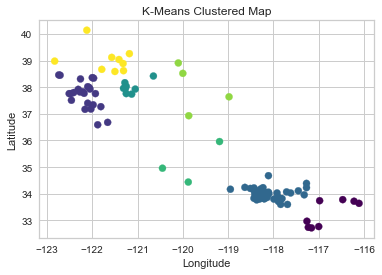

In [10]:
# Instantiate
ct = CoordinateTransformer()
# Fit and transform
ct.fit_transform(df.iloc[:, 0:2])
# Plot
ct.plot()


## Working With Sci-kit Learn Pipeline

In [25]:
# Columns to apply imputation and standardization
num_cols = list(set(df.columns.tolist()) - {'ocean_proximity', 'coord_latitude', 'coord_longitude'})
num_cols

['median_house_value',
 'total_rooms',
 'households',
 'total_bedrooms',
 'population',
 'median_income',
 'housing_median_age']

In [18]:
# Numerical pipeline just for the numeric columns
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True))
])

In [26]:
# Pipeline
pipeline = ColumnTransformer(
    # Select coordinate columns using regex
    [('cluster_coord', CoordinateTransformer(), make_column_selector(pattern='^coord')),
     # Apply imputation and standardization to numeric columns
     ('numerical', numerical_pipeline, num_cols),
     # One-hot categorical column
     ('onehot', OneHotEncoder(), ['ocean_proximity'])]
)

In [27]:
out = pipeline.fit_transform(df)
pd.DataFrame(out)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,1.262242,-0.228314,-0.538789,-0.540708,-0.545657,1.240334,1.820128,1.0,0.0,0.0,0.0
1,3.0,-1.230038,-1.528328,-1.590120,-1.558353,-1.552032,-1.046032,1.241260,0.0,1.0,0.0,0.0
2,3.0,-0.269411,-0.083319,-0.241516,-0.279028,0.003275,-0.303306,-0.495346,0.0,1.0,0.0,0.0
3,1.0,-0.990091,0.110418,0.349404,0.140952,0.251223,-0.801485,1.985519,0.0,0.0,1.0,0.0
4,0.0,1.089179,-0.119105,-0.495286,-0.618243,-0.332183,1.558360,-1.570388,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,2.385908,2.328525,1.531245,1.203825,1.658026,2.685412,-0.164564,0.0,0.0,0.0,1.0
96,1.0,2.063183,-0.191294,-0.723678,-0.757160,-0.548309,2.769527,-1.901170,1.0,0.0,0.0,0.0
97,5.0,-0.215067,0.742841,-0.016749,1.307205,-0.171747,-0.458818,-0.908824,0.0,1.0,0.0,0.0
98,3.0,0.050798,-0.061724,-0.517037,-0.569784,-0.570849,1.141284,0.083522,0.0,1.0,0.0,0.0
